<a href="https://colab.research.google.com/github/Servant7/b2-2/blob/main/PA_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Link Kagle, Import Data, dll**

In [1]:
#link_kagle = https://www.kaggle.com/uciml/pima-indians-diabetes-database
#mengimport dataset
link = "https://drive.google.com/file/d/1Nq_1IsER8sNse48RJE87hvcIBQiWdhqc/view?usp=sharing"
link_url = "https://drive.google.com/uc?id=1Nq_1IsER8sNse48RJE87hvcIBQiWdhqc"

In [2]:
#mengimport pandas, numpy, dll
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#Fungsi ini untuk melihat persentase data terisi dan kosong
def null_ratio(df, limit=-1):
  percent_missing = df.isnull().sum() * 100 / len(df)
  df_result = pd.DataFrame({
      "filled":df.notnull().sum(),
      "N null":df.isna().sum(),
      "null_ratio(%)": percent_missing,
      }
  )
  nr =  df_result.sort_values("null_ratio(%)",ascending=False)
  return nr[nr["null_ratio(%)"] > limit]


# **Business Understanding**<br>

**Determine Business Objectives**
1.   Tentang<br>
Kumpulan data terdiri dari beberapa variabel prediktor medis dan satu variabel target, Hasil. Variabel prediktor meliputi jumlah kehamilan yang dialami pasien, IMT, kadar insulin, usia, dan sebagainya.
<br><br>

2.   Tujuan<br>
Kumpulan data ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang termasuk dalam kumpulan data. Beberapa batasan ditempatkan pada pemilihan instance ini dari database yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan berusia minimal 21 tahun keturunan India Pima.
<br><br>

3. Alasan menggunakan Data Mining <br>
Alasan kami menggunakan data mining pada kasus ini adalah karena ingin memprediksi secara diagnostik apakah seorang pasien menderita diabetes atau tidak dengan berdasarkan pengukuran diagnostik tertentu yang termasuk dalam kumpulan data

**Assess Situasion**


1.   Tools yang digunakan<br>
Tools yang kami gunakan diantaranya adalah kagle berupa sumber dataset, kemudian google drive sebagai penyimpanan data, dan terakhir adalah google collab sebagai eksekusi data
<br><br>

2.   Keuntungan dan Kelebihan<br>
Penelitian ini sangat penting karena bertujuan untuk memprediksi apakah seorang pasien menderita diabetes atau tidak. Data yang dikumpulkan dari penelitian ini dapat memberikan informasi yang berguna bagi pihak dinas kesehatan agar dapat melakukan peningkatan kesadaran masyarakat tentang diabetes ataupun meningkatkan perencanaan dan pengelolaan sumber daya kesehatan. Bagi para penyedia layanan kesehatan dan para peneliti juga agar dapat memberikan layanan yang lebih baik seperti memberikan penanganan yang tepat, meminimalkan risiko komplikasi, menyediakan layanan konseling yang lebih baik, serta mengembangkan program pengendalian diabetes yang lebih baik.

# **Data Understanding**<br>
Terdiri atas collect initial data, describe data, dan explore data

**1. Collect Initial Data**

In [4]:
#memasukkan dataset kedalam variable df
df = pd.read_csv(link_url)

In [5]:
# Terdapat 768 baris dan 9 kolom pada data ini
df.shape

(768, 9)

In [6]:
#terdapat 268 pasien yang terkena diabetes dan 500 tidak
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
#menampilkan 5 data teratas
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#melihat daftar kolom yang ada pada dataframe
print("Daftar kolom:")
for col in df.columns:
  print(col)

Daftar kolom:
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


**2. Describe Data**<br>


> Dataset ini memiliki beberapa kolom atau kriteria-kriteria yang akan menentukan apakah seorang pasien mengidap diabetes atau tidak. Dataset yang digunakan memiliki 768 baris data yang tersusun dalam 9 kolom. 

> Berikut beberapa kolom yang tersedia diantaranya yaitu: 

> 1. **Pregnancies:** Kolom Pregnancies digunakan untuk menunjukkan jumlah frekuensi kehamilan seorang pasien.
2. **Glucose:** Kolom Glucose digunakan 
untuk mengetahui kadar glukosa darah 2 jam setelah mengkonsumsi larutan glukosa, yang dilakukan dalam tes toleransi glukosa oral untuk mendeteksi penyakit diabetes.
3. **BloodPressure:** Kolom BloodPressure menunjukkan tekanan darah diastolik seseorang dalam mmHg.
4. **SkinThickness:** Kolom SkinThickness digunakan untuk menunjukkan ketebalan lipatan kulit trisep (mm) untuk memeriksa cadangan lemak pada tubuh dan mendeteksi diabetes pada wanita.
5. **Insulin:** Kolom Insulin digunakan 
untuk mengetahui kadar insulin di
dalam darah 2 jam setelah makan dalam satuan mu U/ml.
6. **BMI:** Kolom BMI digunakan untuk mengukur indikator massa tubuh pasien (berat dalam kg/(tinggi dalam m)^2).
7. **DiabetesPedigreeFunction:** Kolom DiabetesPedigreeFunction digunakan untuk menilai kemungkinan diabetes berdasarkan hubungan genetik riwayat keluarga. 
8. **Age:** Kolom Age menunjukkan usia pasien wanita suku Indian Pima.
9. **Outcome:** Kolom Outcome merupakan target nilai prediksi apakah seorang pasien mengidap diabetes atau tidak. Dengan nilai 0 untuk tidak mengidap diabetes dan 1 untuk mengidap diabetes.



**3. Eksplore Data**<br>
Terbagi menjadi comparison dan distribution


**A. Comparison**

<Axes: xlabel='Outcome', ylabel='count'>

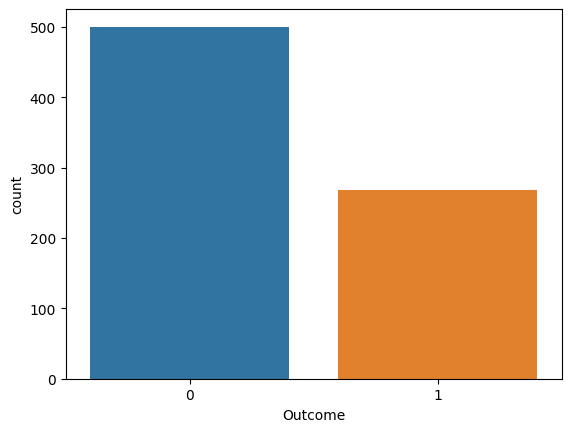

In [9]:
#Perbandingan Pasien yang diabetes dan Tidak
sns.countplot(data=df,x="Outcome")
#pada gambar dibawah, dapat dilihat pasien yang terkena diabetes berjumlah lebih sedikit (sekitar 200an) 
#sementara yang tidak berjumlah sekitar kurang dari 500an
#jika kita menggunakan sintaks "df.Outcome.value_counts()" maka pada outputnya, terdapat 268 pasien yang terkena diabetes dan 500 tidak

<Axes: xlabel='Age', ylabel='count'>

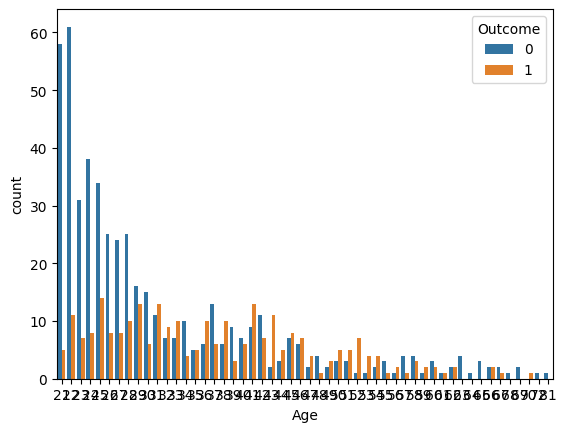

In [10]:
#Perbandingan Pasien yang Outcome dan tidak berdasarkan Umur
sns.countplot(data=df,x="Age",hue="Outcome")

**B. Distribution**

<Axes: xlabel='Age', ylabel='Count'>

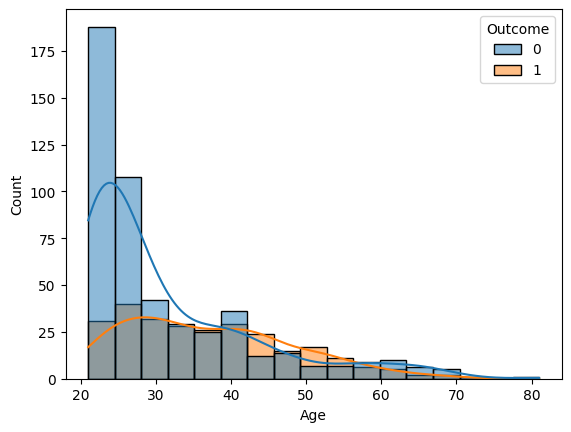

In [11]:
#perbandingan pasien yang diabetes dan tidak berdasarkan umur menggunakan diagram batang dengan bantuan garis
#sebenarnya sama aja kek di atas, cuman yang ini lebih interaktif/menarik tampilannya

sns.histplot(data=df,x="Age",hue='Outcome',kde=True)
#kde=True berguna untuk menambahkan garis

In [12]:
#menggunakan histogram (sama juga kek 2 diagram di atas, cuman ini data yang ditampilkan jauh lebih menarik)
#intinya 3 diagram batang ini sama aja, cuman makin kesini makin menarik
#tampilin aja di ppt 3 gambar diagram batang ini
px.histogram(df,x="Age",color='Outcome')

<Axes: xlabel='Age'>

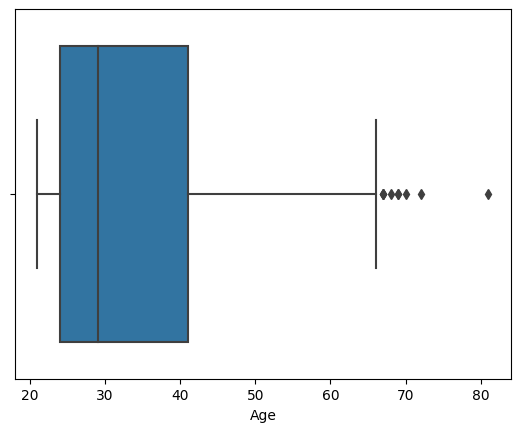

In [13]:
#melihat data pasien diabetes berdasarkan umur menggunakan boxplot
#Berdasarkan visualisasi tersebut, kita dapat melihat bahwa data Age memiliki median sekitar 29 tahun, 
#kuartil pertama sekitar 23 tahun, dan kuartil ketiga sekitar 41 tahun. 
#Terdapat juga beberapa titik di luar whiskers yang menunjukkan adanya outlier pada data Age.
sns.boxplot(data=df,x="Age")

# **Data Preparation**<br>
Terdiri atas select data, clean data, construct data, integrate data, dan format data

**1. Select data**<br>
Adalah bagian menentukan dataset yang akan digunakan apabila terdapat banyak tabel

**2. Clean Data**<br>
Terbagi menjadi 3, yaitu Datatype, Missing value, dan Outlier Handling

**A. Datatype**

In [14]:
#menyalin data dari variable df kedalam df2 sebagai variable baru
df2 = df.copy(deep=True)

In [15]:
#melihat tipe data seluruh kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
#mengimport nilai nan dari numpy, digunakan untuk merepresentasikan nilai yang tidak valid atau tidak terdefinisi
#tapi karna gada nilai nan, jadi import ini gak kepake (namun tetap ditulis sebagai pengetahuan saja)
from numpy import nan

**B. Missing value**

In [18]:
#melihat jumlah nilai nan
df2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
#melihat rasio nilai null
null_ratio(df2)

,filled,N null,null_ratio(%)
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


<Axes: >

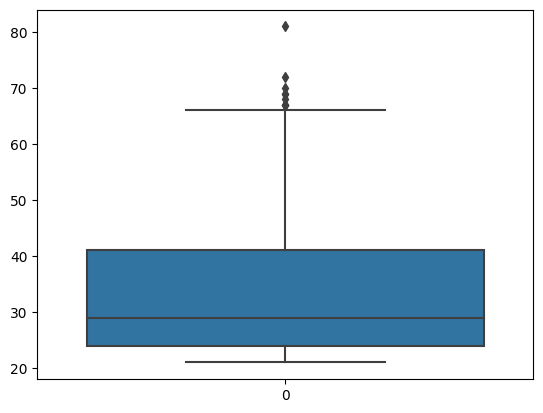

In [20]:
#melihat data age sebagai boxplot
sns.boxplot(df2.Age)

**C. Outlier Handling**

In [21]:
# Outlier
# Batas atas Q3 + 1.5*IQR
# IQR = Q3-Q1
#Baris kode dibawah digunakan untuk mengidentifikasi dan menghapus nilai-nilai outlier pada variabel Age pada dataframe df2.
#intinya nilai outlier ini adalah nilai yang berada di luar jangkauan perkiraan data normal sehingga perlu dihapus

q3 = df2.Age.quantile(0.75)
q1 = df2.Age.quantile(0.25)
iqr = q3 - q1
ba = q3 + (1.5*iqr)
bw = q1 - (1.5*iqr)

print(q3,q1,iqr,ba,bw)

41.0 24.0 17.0 66.5 -1.5


In [22]:
#menampilkan baris-baris pada dataframe df2 yang memiliki nilai Age di luar batas atas dan batas bawah
df2[(df2.Age > ba) | (df.Age < bw)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [23]:
#hasilnya ada 9 baris data
#kemudian kita bagi dia dengan banyaknya data dari df2 dan dikalikan 100
9/len(df2)*100

1.171875

In [24]:
#Pada baris ini, dilakukan filtering pada DataFrame df2 dengan menghapus baris yang memiliki nilai Age di luar batas bawah (bw) dan batas atas (ba)
#baris yang tersisa adalah baris yang nilai Age-nya tidak termasuk sebagai outlier karena menggunakan negasi/kebalikan
df3 = df2[~((df2.Age > ba) | (df.Age < bw))]

<Axes: >

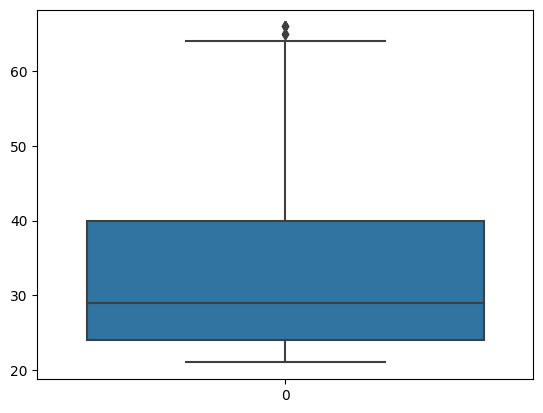

In [25]:
#data boxplot yang ditampilkan adalah data yang sudah di outlier
#outlier sendiri artinya menghapus data yang berada diluar jangkauan normal (data tidak wajar) sehingga harus dihapus untuk analisis lebih lanjut
#data outlier bisa disebabkan oleh kesalahan pengukuran, pengumpulan data yang buruk, atau beberapa faktor lainnya.
#lihat boxplot age berikut (lihat data sudah di outlier atau diminimalisir)
sns.boxplot(df3.Age)

**3. Construct Data**

1.   Hapus Kolom yang tidak digunakan
2.   Ekstrak Kolom yang ada



In [26]:
#melihat 5 kolom teratas
#karna dirasa setiap kolom penting, jadi tidak ada kolom yang dihapus disini
#misal klo mau dihapus, pake df3 = df2.drop(columns=["id"])
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**4. Visualisasi Korelasi**

In [27]:
#menghitung nilai korelasi antar kolom untuk menunjukkan seberapa kuat hubungan antar kolom tersebut
df3.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.124529,0.136943,-0.081686,-0.072283,0.019102,-0.032479,0.567149,0.226778
Glucose,0.124529,1.000000,0.150956,0.059542,0.336411,0.227871,0.141262,0.273302,0.470263
BloodPressure,0.136943,0.150956,1.000000,0.209117,0.089696,0.284681,0.047657,0.259467,0.062724
SkinThickness,-0.081686,0.059542,0.209117,1.000000,0.433188,0.390470,0.189589,-0.087890,0.071594
Insulin,-0.072283,0.336411,0.089696,0.433188,1.000000,0.194754,0.187378,-0.020540,0.129826
BMI,0.019102,0.227871,0.284681,0.390470,0.194754,1.000000,0.148686,0.074294,0.288611
DiabetesPedigreeFunction,-0.032479,0.141262,0.047657,0.189589,0.187378,0.148686,1.000000,0.029428,0.178123
Age,0.567149,0.273302,0.259467,-0.087890,-0.020540,0.074294,0.029428,1.000000,0.266268
Outcome,0.226778,0.470263,0.062724,0.071594,0.129826,0.288611,0.178123,0.266268,1.000000


<Axes: >

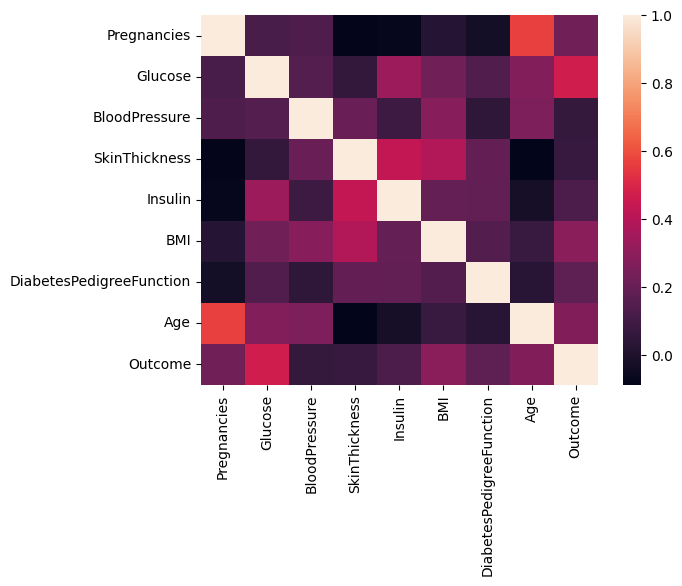

In [28]:
#digunakan untuk memvisualisasikan korelasi antar fitur dalam dataframe df3
#pada gambar ini menunjukkan seberapa erat hubungan antar kolom data 
#semakin cerah warna pada heatmap menunjukkan semakin tinggi korelasi antara dua variabel
#sedangkan semakin gelap berarti semakin rendah korelasi atau hubungannya 
sns.heatmap(df3.corr())

In [29]:
#Fungsi dari px.imshow(df3.corr()) adalah untuk menampilkan matriks korelasi sebagai gambar heatmap
#hasil gambar ini sebenarnya sama aja kek di atas, bedanya yang ini lebih menarik atau interaktif
px.imshow(df3.corr())

**5. Format Data / Preprocessing**

A. Encoding<br>
B. Train-test split<br>
C. Cross_validation (optional)

**A. Encoding**

In [30]:
#fungsi pd.get_dummies() digunakan untuk melakukan one-hot encoding pada dataframe df3
# One-hot encoding adalah proses mengubah variabel kategorikal menjadi bentuk numerik agar bisa diproses oleh algoritma machine learning
df4 = pd.get_dummies(df3)

In [31]:
#melihat 5 data teratas
#karna datanya memang numerik dari awal, jadi saya rasa proses ini gak diperlukan
#tapi tetap ditampilkan sebagai pengetahuan saja, dan pada proses algoritma, kita akan menggunakan df3
#kenapa df3? karna datanya sudah dicleaning, outlier, dan difilter sedemikian rupa sehingga cukup efektif untuk dianalisa
df4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**B. Train-test Split**

In [32]:
#membagi data jadi 2 variable yaitu x dan y dimana x berisi semua data kecuali kolom terakhir sementara y berisi data target atau prediksi
X = df3.drop('Outcome', axis=1)
y = df3['Outcome']

In [33]:
#data x dan y tadi kita bagi lagi jadi data training dan data testing menggunakan sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling dan Evaluation**

# **C4.5**

In [34]:
#melihat 5 data teratas
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
#Menentukan fungsi untuk menghitung entropy dari sebuah dataset. 
#Fungsi ini akan menghitung entropy dari target class (diabetes) dalam dataset
#Berikut adalah implementasi fungsi entropy:
import math
def entropy(df3):
    target_col = df3[df3.columns[-1]]
    values = target_col.unique()
    entropy = 0
    for val in values:
        p = float(target_col[target_col == val].count()) / len(target_col)
        entropy += -p * math.log(p, 2)
    return entropy

In [36]:
#Menentukan fungsi untuk menghitung information gain dari setiap atribut dalam dataset. 
#Berikut adalah implementasi fungsi information_gain:
def information_gain(df3, attribute_name):
    total_entropy = entropy(df3)
    attribute_values = df3[attribute_name].unique()
    weighted_entropy = 0
    for value in attribute_values:
        subset = df3[df3[attribute_name] == value]
        subset_entropy = entropy(subset)
        weighted_entropy += (len(subset) / len(df3)) * subset_entropy
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [37]:
#Menentukan fungsi untuk memilih atribut terbaik untuk splitting. 
#Berikut adalah implementasi fungsi best_attribute:
def best_attribute(df3):
    information_gains = {}
    for col in df3.columns[:-1]:
        information_gains[col] = information_gain(df3, col)
    best_attribute = max(information_gains, key=information_gains.get)
    return best_attribute

In [38]:
#Menentukan fungsi untuk membagi dataset menjadi subset yang lebih kecil berdasarkan nilai atribut terbaik. 
#Berikut adalah implementasi fungsi split_data
def split_df3(df3, attribute_name, attribute_value):
    subset = df3[df3[attribute_name] == attribute_value].reset_index(drop=True)
    subset = subset.drop(attribute_name, axis=1)
    return subset

In [39]:
#Menentukan fungsi untuk membangun pohon keputusan dengan rekursi. 
#Berikut adalah implementasi fungsi build_tree:
def build_tree(df3):
    if len(df3.columns) == 1:
        target_col = df3.columns[0]
        return df3[target_col].mode()[0]
    best_attr = best_attribute(df3)
    tree = {best_attr: {}}
    for value in df3[best_attr].unique():
        subset = split_df3(df3, best_attr, value)
        subtree = build_tree(subset)
        tree[best_attr][value] = subtree
    return tree

In [40]:
#Terakhir, panggil fungsi build_tree dengan dataset sebagai argumen dan mencetak hasilnya sebagai pohon keputusan:
decision_tree = build_tree(df3)
print(decision_tree)

{'DiabetesPedigreeFunction': {0.627: {'Pregnancies': {6: {'Glucose': {148: {'BloodPressure': {72: {'SkinThickness': {35: {'Insulin': {0: {'BMI': {33.6: {'Age': {50: 1}}}}}}}}}}}}}}, 0.351: {'Pregnancies': {1: {'Glucose': {85: {'BloodPressure': {66: {'SkinThickness': {29: {'Insulin': {0: {'BMI': {26.6: {'Age': {31: 0}}}}}}}}}}}}}}, 0.672: {'Pregnancies': {8: {'Glucose': {183: {'BloodPressure': {64: {'SkinThickness': {0: {'Insulin': {0: {'BMI': {23.3: {'Age': {32: 1}}}}}}}}}}}}}}, 0.167: {'Pregnancies': {1: {'Glucose': {89: {'BloodPressure': {66: {'SkinThickness': {23: {'Insulin': {94: {'BMI': {28.1: {'Age': {21: 0}}}}}}}}}}}}, 0: {'Glucose': {114: {'BloodPressure': {80: {'SkinThickness': {34: {'Insulin': {285: {'BMI': {44.2: {'Age': {27: 0}}}}}}}}}}}}, 2: {'Glucose': {139: {'BloodPressure': {75: {'SkinThickness': {0: {'Insulin': {0: {'BMI': {25.6: {'Age': {29: 0}}}}}}}}}}}}, 10: {'Glucose': {92: {'BloodPressure': {62: {'SkinThickness': {0: {'Insulin': {0: {'BMI': {25.9: {'Age': {31: 0}}

In [41]:
#Membuat fungsi untuk memprediksi hasil dari dataset menggunakan pohon keputusan yang telah dibangun. 
#Berikut adalah implementasi fungsi predict:
def predict(tree, df3):
    if type(tree) != dict:
        return tree
    attribute = list(tree.keys())[0]
    value = df3[attribute]
    if value not in tree[attribute]:
        return 0
    subtree = tree[attribute][value]
    return predict(subtree, df3)

In [42]:
#Membuat fungsi untuk menghitung matriks evaluasi menggunakan library scikit-learn. Berikut adalah implementasi fungsi evaluate:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def evaluate(tree, df3):
    predicted = []
    actual = []
    for i in range(len(df3)):
        predicted.append(predict(tree, df3.iloc[i]))
        actual.append(df3.iloc[i][-1])
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    auc = roc_auc_score(actual, predicted)
    return [accuracy, precision, recall, f1, auc]

In [43]:
#Memanggil fungsi evaluate dengan menggunakan dataset yang sama dengan dataset yang digunakan untuk membangun pohon keputusan. 
#Berikut adalah implementasi kode:
result = evaluate(decision_tree, df3)
print("Accuracy:", result[0])
print("Precision:", result[1])
print("Recall:", result[2])
print("F1 Score:", result[3])
print("AUC:", result[4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


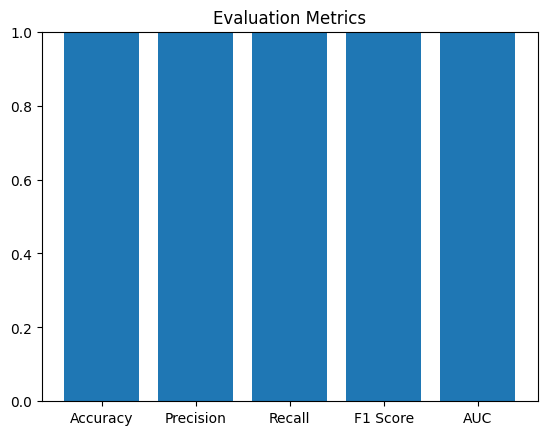

In [44]:
#Terakhir, kita dapat memvisualisasikan matriks evaluasi menggunakan matplotlib.
#Berikut adalah implementasi kode untuk memvisualisasikan matriks evaluasi:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
values = result
plt.bar(labels, values)
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.show()
#hasilnya menunjukkan nilai 1.0 semua
#ini menandakan matriks evaluasi menunjukkan bahwa model pohon keputusan memiliki performa yang sangat baik pada dataset yang digunakan

# **KNN**

In [45]:
#mengimport library
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [46]:
#melihat 5 data teratas
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
#melakukan normalisasi agar data dapat dibandingkan lebih mudah
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
#model knn pada data training
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
#membuat variable baru berupa y_pred yang isinya berupa prediksi yang diambil dari x_test
y_pred = knn.predict(X_test)

In [50]:
#menghitung matriks evaluasi menggunakan accuracy, precision, dll  
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

#mengeluarkan hasilnya
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)

Accuracy: 0.7368421052631579
Precision: 0.6666666666666666
Recall: 0.5185185185185185
F1-score: 0.5833333333333334
AUC: 0.6878306878306879


In [51]:
#menyimpan daftar metrik evaluasi yang akan digunakan untuk mengevaluasi kinerja model.
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
values = [accuracy, precision, recall, f1, auc]

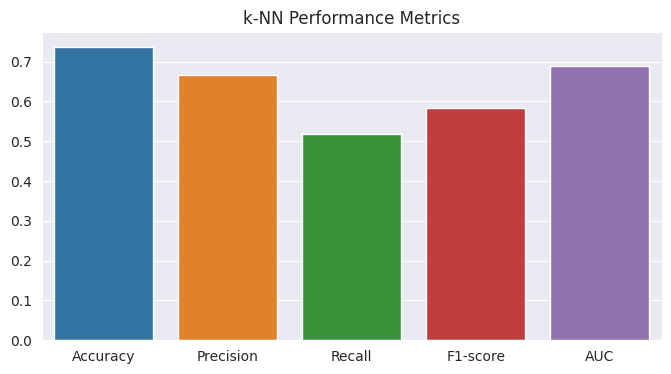

In [52]:
#Melihat hasil visualisasinya
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
sns.barplot(x=metrics, y=values)
plt.title("k-NN Performance Metrics")
plt.show()

#hasilnya
#Accuracy: 0.7171052631578947
#Precision: 0.6170212765957447
#Recall: 0.5370370370370371
#F1-score: 0.5742574257425743
#AUC: 0.6766817838246411

# **Naive Bayes**

In [53]:
#mengimport library
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [54]:
#melihat 5 data teratas
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
#membuat klasifikasi naive bayes menggunakan gaussiannb
nb = GaussianNB()

In [56]:
#melatih model Naive Bayes dengan menggunakan data training 
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
#membuat variable baru berupa y_pred yang isinya berupa prediksi yang diambil dari x_test
y_pred = nb.predict(X_test)

In [58]:
#menghitung matriks evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

#mengeluarkan outputnya
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)

Accuracy: 0.7171052631578947
Precision: 0.6170212765957447
Recall: 0.5370370370370371
F1-score: 0.5742574257425743
AUC: 0.6766817838246411


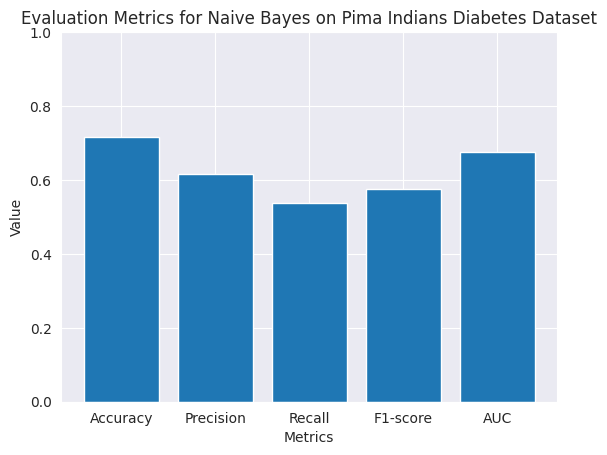

In [59]:
#membuat diagram batang
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "AUC"]
values = [accuracy, precision, recall, f1, auc]

fig, ax = plt.subplots()
ax.bar(metrics, values)
ax.set_ylim(0, 1)
ax.set_title("Evaluation Metrics for Naive Bayes on Pima Indians Diabetes Dataset")
ax.set_xlabel("Metrics")
ax.set_ylabel("Value")

#menampilkan hasil diagram
plt.show()

#hasilnya :
#Accuracy: 0.7171052631578947
#Precision: 0.6170212765957447
#Recall: 0.5370370370370371
#F1-score: 0.5742574257425743
#AUC: 0.6766817838246411

# **Deployment**

In [60]:
df3.to_csv("output.csv")